# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [83]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [84]:
kolonner_obj = df.select_dtypes(include=["object"]).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [85]:
for i in kolonner_obj:
    #print("-----------")
    #print(i)
    #print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        #print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

C:\Users\Jesper\AppData\Local\Temp\ipykernel_4368\1482508270.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\Jesper\AppData\Local\Temp\ipykernel_4368\1482508270.py:7: SettingWithCopyWarning: 
A value is

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [67]:
#print(df.dtypes)

In [86]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

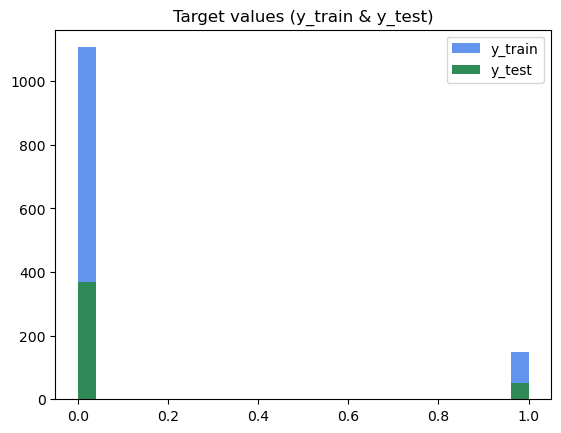

In [87]:
#TODO: visualiser y_train og y_test i et histogram
plt.hist(y_train, bins=25, color="cornflowerblue", label="y_train")
plt.hist(y_test, bins=25, color="seagreen", label="y_test")
plt.title("Target values (y_train & y_test)")
plt.legend()
plt.show()

**Svar:**

Her ser det ut som at vi skal løse et klassifiseringsproblem fordi x-aksen er tydelig delt i to verdier. Det betyr at y_train og y_test bare har to mulige utfall.

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


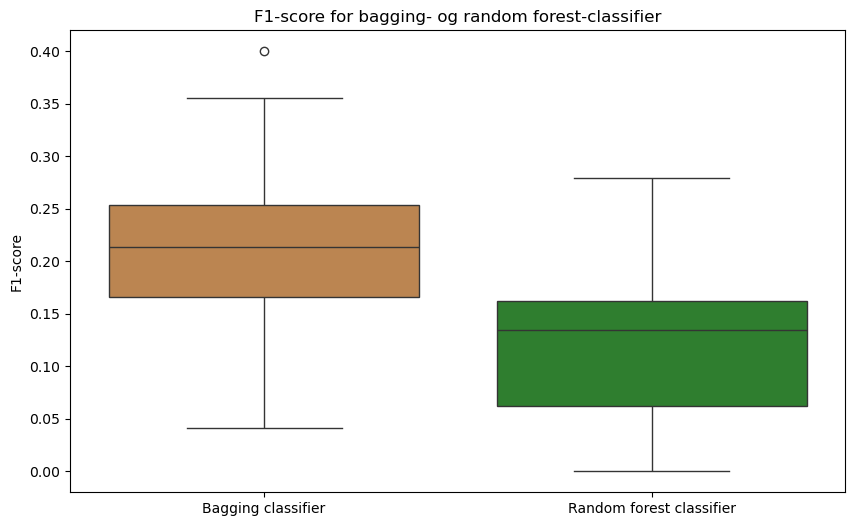

T-statistikk: 5.7619, P-verdi: 9.614782810043949e-08


In [89]:
#TODO: repeterte kryssvalideringer for to modeller

rkf = RepeatedKFold(n_splits=5, n_repeats=10)
model_1 = BaggingClassifier(random_state=42)
model_2 = RandomForestClassifier(random_state=42)

# Definerer scorer
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)

# Beregner F1-score og accuracy for begge modellene
f1_scores_model_1 = cross_val_score(model_1, X, y, scoring=f1_scorer, cv=rkf)
f1_scores_model_2 = cross_val_score(model_2, X, y, scoring=f1_scorer, cv=rkf)
accuracy_scores_model_1 = cross_val_score(model_1, X, y, scoring=accuracy_scorer, cv=rkf)
accuracy_scores_model_2 = cross_val_score(model_2, X, y, scoring=accuracy_scorer, cv=rkf)

f1_df = pd.DataFrame({
    "Bagging classifier": f1_scores_model_1,
    "Random forest classifier": f1_scores_model_2
})

palette = {"Bagging classifier": "peru", "Random forest classifier":"forestgreen"}
plt.figure(figsize=(10, 6))
sns.boxplot(data=f1_df, palette=palette)
plt.title("F1-score for bagging- og random forest-classifier")
plt.ylabel("F1-score")
plt.show()

# Utfører to-sidig t-test
t_stat, p_value = ttest_ind(f1_scores_model_1, f1_scores_model_2)

# Resultater
print(f"T-statistikk: {t_stat:.4f}, P-verdi: {p_value}")


**Svar:**

Ut i fra boksplottet kan man se at bagging classifier har høyere median enn random forest. Dette tyder på at bagging classifier presterer bedre i gjennomsnitt. Spredningen i de to modellene ser ut til å være nokså lik.

En T-statistikk på 5.7619 er høyt og indikerer en stor forskjell i gjennomsnittlig F1-score mellom de to modellene. Resultatet er positivt og det vil si at modell 1 (bagging) har høyere gjennomsnittlig F1-score enn modell 2 (random forest).

P-verdien på 9.6148e-08 er veldig liten og under den typiske signifikans-grensa på 0.05. En så lav P-verdi indikerer at forskjellene mellom de to modellene er statistisk signifikant.

Totalt sett kan vi konkludere med at bagging classifier presterer signifikant bedre enn random forest classifier og dermed passer bedre for datasettet fordi den har bedre gjennomsnittlig F1-score.


#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

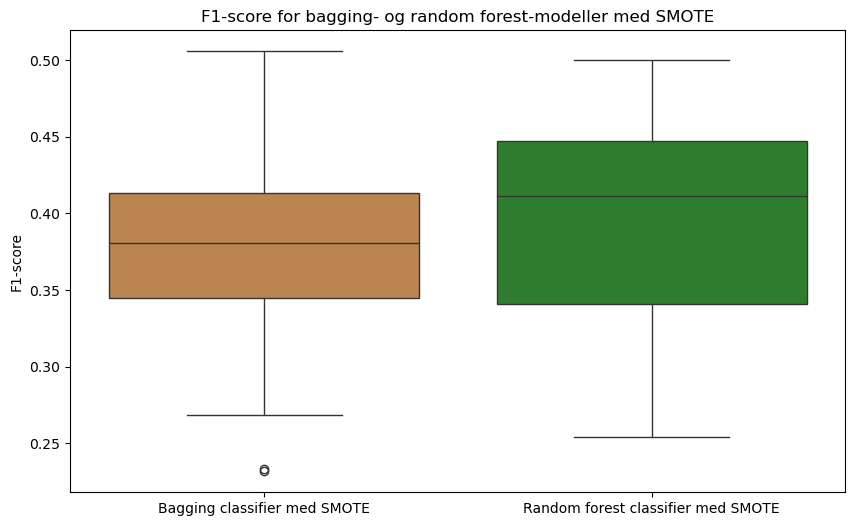

T-statistikk: -1.1314, P-verdi: 0.2606300704130758


In [91]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
pipeline_model_1 = Pipeline([('smote', smote), ('model', BaggingClassifier(random_state=42))])
pipeline_model_2 = Pipeline([('smote', smote), ('model', RandomForestClassifier(random_state=42))])

# Repeterte kryssvalideringer
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)

# Beregner F1-score og accuracy for begge modellene med SMOTE
f1_scores_model_1 = cross_val_score(pipeline_model_1, X, y, scoring=f1_scorer, cv=rkf)
f1_scores_model_2 = cross_val_score(pipeline_model_2, X, y, scoring=f1_scorer, cv=rkf)

accuracy_scores_model_1 = cross_val_score(pipeline_model_1, X, y, scoring=accuracy_scorer, cv=rkf)
accuracy_scores_model_2 = cross_val_score(pipeline_model_2, X, y, scoring=accuracy_scorer, cv=rkf)

f1_df_smote = pd.DataFrame({
    "Bagging classifier med SMOTE": f1_scores_model_1,
    "Random forest classifier med SMOTE": f1_scores_model_2
})

palette = {"Bagging classifier med SMOTE": "peru", "Random forest classifier med SMOTE":"forestgreen"}
plt.figure(figsize=(10, 6))
sns.boxplot(data=f1_df_smote, palette=palette)
plt.title("F1-score for bagging- og random forest-modeller med SMOTE")
plt.ylabel("F1-score")
plt.show()

t_stat, p_value = ttest_ind(f1_scores_model_1, f1_scores_model_2)

print(f"T-statistikk: {t_stat:.4f}, P-verdi: {p_value}")


**Svar:**

Etter å ha brukt SMOTE har begge modellene forbedret median F1-score. Random forest classifier har forbedret sin median såpass mye at den har gått forbi bagging classifier. Spredningen er fortsatt ganske lik, men random forest viser litt høyere variasjon.

T-statistikken på -1.1314 forteller at random forest potensielt utkonkurrerer bagging classifier. T-statistikken er dog ganske lav og viser nå at forskjellen i gjennomsnittlig F1-score mellom de to modellene er mindre enn før, og selv om random forest virker å være litt bedre er den ikke nødvendigvis alltid best.

P-verdien på 0.2606 er høy og over signifikans-grensa på 0.05. Dette betyr at det ikke er noen statistisk signifikant forskjell på de to modellenes ytelse med SMOTE.

Konklusjonen er at SMOTE har forbedret F1-score for begge modellene, men spesielt random forest som med SMOTE blir den foretrukne modellen for videre bruk. Med SMOTE er modellenes yteslse på datasettet mye mer likt enn tidligere. Uten SMOTE var nemlig forskjellen av modellene statistisk signifikant, men med SMOTE er mye av forskjellene forsvunnet og begge modellene håndterer datasettet noenlunde likt.

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [ ]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

smote = SMOTE(random_state=42)
best_model = Pipeline([('smote', smote), ('model', RandomForestClassifier(random_state=42))])

# Trener på hele treningssettet og gjør prediksjoner på testsettet
best_model.fit(X_train, y_train)
y_prediction = best_model.predict(X_test)

# Beregner verdiene
recall = recall_score(y_test, y_prediction)  # Sensitivitet
precision = precision_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

# Beregner spesifisitet manuelt fra confusion matrix 
conf_matrix = confusion_matrix(y_test, y_prediction)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Sensitivitet: {recall:.4f}")
print(f"Spesifisitet: {specificity:.4f}")
print(f"Presisjon: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Sensitivitet: 0.3000
Spesifisitet: 0.9568
Presisjon: 0.4839
F1-score: 0.3704
Accuracy: 0.8786


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [93]:
#TODO: Gjør kjønnsbasert analyse på testdataene

# Menn og kvinner filtreres
X_test_men = X_test[X_test['Gender'] == 0]
X_test_women = X_test[X_test['Gender'] == 1]

y_test_men = y_test[X_test['Gender'] == 0]
y_test_women = y_test[X_test['Gender'] == 1]

# Gjør prediksjoner
y_pred_men = best_model.predict(X_test_men)
y_pred_women = best_model.predict(X_test_women)

# Metrikker for menn
recall_men = recall_score(y_test_men, y_pred_men)
precision_men = precision_score(y_test_men, y_pred_men)
conf_matrix_men = confusion_matrix(y_test_men, y_pred_men)
tn_men, fp_men, fn_men, tp_men = conf_matrix_men.ravel()
specificity_men = tn_men / (tn_men + fp_men)

# Metrikker for kvinner
recall_women = recall_score(y_test_women, y_pred_women)
precision_women = precision_score(y_test_women, y_pred_women)
conf_matrix_women = confusion_matrix(y_test_women, y_pred_women)
tn_women, fp_women, fn_women, tp_women = conf_matrix_women.ravel()
specificity_women = tn_women / (tn_women + fp_women)

print("Resultater for testsett av menn:")
print(f"Sensitivitet: {recall_men:.4f}")
print(f"Spesifisitet: {specificity_men:.4f}")
print(f"Presisjon: {precision_men:.4f}")

print("\nResultater for testsett av kvinner:")
print(f"Sensitivitet: {recall_women:.4f}")
print(f"Spesifisitet: {specificity_women:.4f}")
print(f"Presisjon: {precision_women:.4f}")

Resultater for testsett av menn:
Sensitivitet: 0.3056
Spesifisitet: 0.9447
Presisjon: 0.4783

Resultater for testsett av kvinner:
Sensitivitet: 0.2857
Spesifisitet: 0.9739
Presisjon: 0.5000


**Svar:**

Modellen identifiserer 30.56% av de positive tilfellene blant menn korrekt. At ca 70% av de positive tilfellene blir oversett er tegn på at modellen sliter med å identifisere positive tilfeller. Blant kvinner er tallet for sensitivitet enda lavere (28.57%), som betyr at modellen gjør det enda litt værre når den forsøker å identifisere positive tilfeller for kvinner. 
Modellen er derimot mye bedre på å identifisere negative tilfeller for både kvinner og menn. Med spesifisitet på 94.47% for menn og 97.39% for kvinner klarer den å unngå de fleste falske positive for begge kjønn.
Når modellen predikerer et tilfelle som positivt er den korrekt for menn 47.83% av gangene, og for kvinner 50% av gangene.

Modellen er ikke like god for begge kjønn, kvinner scorer nemlig litt bedre på 2 av 3 metrikker(spesifisitet og presisjon) og litt dårligere på 1(sensitivitet). Selv om modellen er ulik for de to kjønnene, er det ikke veldig stor forskjell på de, men det er en forskjell der.

Årsaker til at modellen er ulik for kvinner og menn kan være skjevhet i datasettet, altså at det er f.eks er flere menn enn kvinner. Da kan modellen ha lært mindre om kvinner, og det kan føre til at ytelsen påvirkes. En annen årsak kan være at et av kjønnene blir sterkere påvirket av en eller flere egenskaper enn det andre kjønnet. 

Tiltak kan være å samle inn mer data slik at modelltreningen blir mer robust. Et annet tiltak kan være å finne en modell som yter bedre enn det random forest classifer med SMOTE gjør. Det kan også være et tiltak å undersøke om noen egenskaper har mer påvirkning for et av kjønnene enn det andre og eventuelt forsøke å balansere dette.


Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [ ]:
#!pip freeze > requirements.txt